<a href="https://colab.research.google.com/github/jear2412/MetodosLineales/blob/master/SimulacionesLimite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import scipy
import scipy.stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

sns.set_theme(style="darkgrid") 


In [62]:
# Caso univariado
# Dado que x_i ~ N( \mu, \sigma^2)
# \bar{x} ~ N( \mu ,\sigma^2/n )

mu=5
sigma=2

M=1000
N=1000

xbar=np.zeros(M)

#M muestras de tamano N, guardamos la media empirica

for i in range(M):
  xbar[i]=np.mean(scipy.stats.norm.rvs(loc=mu, scale=sigma, size=N)  )


print('Media empirica de xbarra: ',np.mean(xbar))
print('Varianza empirica de xbarra: ',np.var(xbar))

print( 'Varianza teorica sigma^2/n: ', sigma**2/ M)


Media empirica de xbarra:  4.9969311695041245
Varianza empirica de xbarra:  0.003820371784802991
Varianza teorica sigma^2/n:  0.004


In [ ]:
#Convergencia en probabilidad

#xbar converge en probabilidad a mu

mu=5
sigma=1

M=100

xbar=np.zeros(M)
sample=np.zeros(M)

#Como se mueve xbarra a medida cambia el tamano de muestra?

for i in range(M):
  #sample[i]=scipy.stats.norm.rvs(loc=mu, scale=sigma, size=1)
  #sample[i]=scipy.stats.t.rvs(df=1, size=1)
  #sample[i]=scipy.stats.uniform.rvs(size=1)
  sample[i]=scipy.stats.cauchy.rvs(1)
  xbar[i]=np.mean(sample[0:i]  )

plt.plot(xbar)
plt.xlabel('Tamano de muestra')
plt.ylabel(r'$\bar{x}$')


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, '$\\bar{x}$')

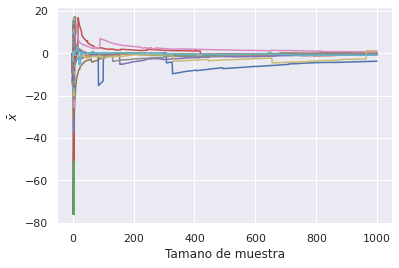

In [87]:
#Convergencia en probabilidad

# xbar converge en probabilidad a mu

mu=5
sigma=1

M=1000
N=1000
K=10 #tamano de la poblacion

xbar=np.zeros( (K, M) )
sample=np.zeros(M)
for i in range(K):
  for j in range(M):
    sample[j]=scipy.stats.t.rvs(df=1, size=1)
    #sample[j]=scipy.stats.norm.rvs(loc=mu, scale=sigma, size=1)  
    xbar[i,j]=np.mean(sample[0:j]  )
    

for i in range(K):
  plt.plot(xbar[i])

plt.plot(xbar)
plt.xlabel('Tamano de muestra')
plt.ylabel(r'$\bar{x}$')



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Media:  5.000368496211278
Varianza estimada:  0.0010284465396141775
Varianza teorica sigma^2/n: 0.001


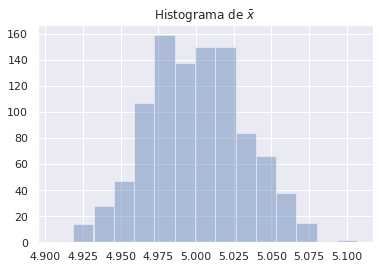

In [102]:
#TCL univariado

# \sqrt{n}( \bar x -mu ) ~ N(0, sigma^2)

M=1000
N=1000

xbar=np.zeros(M)


#uniforme
#mu=1/2
#sigma= 1/12

#normal
mu =5
sigma=1

for i in range(M):
  #xbar[i]=np.mean(scipy.stats.uniform.rvs(size=N))
  xbar[i]=np.mean(scipy.stats.norm.rvs(loc=mu, scale=sigma,size=N))

# \sqrt{n}( \bar x -mu ) ~ N(0, sigma^2) univariado
# \sqrt{n}( \bar x -mu ) ~ N_p(0, Sigma) multivariado

# \bar{x} ~ N(mu, sigma^2/ n) es asintotico! n es muy grande

sns.distplot(xbar, kde=False, bins=15)
plt.title('Histograma de '+r'$\bar{x}$')
print('Media: ',np.mean(xbar))

S=M*np.var( xbar)
print('Varianza estimada: ', S/M)
print('Varianza teorica sigma^2/n:' , sigma**2*1/M)

#nos permite hacer inferencia en \mu cuando tenemos muestras grandes, \mu= E(x)




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


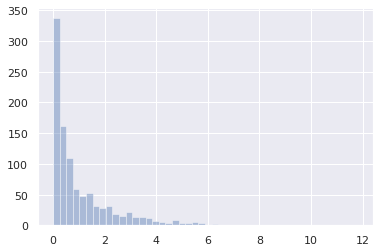

In [107]:
# \sqrt{n}( \bar x -mu ) ~ N(0, sigma^2)

# n ( \bar x -mu )' S ( \bar x -mu ) ~ chi2(1) caso univariado
# n ( \bar x -mu )' S ( \bar x -mu ) ~ chi2(p) caso multivariado

sns.distplot(N*(xbar-mu) *S*(xbar-mu) , kde= False)


In [57]:
#TCL Multivariado

#Tarea : lunes 26 de octubre
# \sqrt{n}( \bar x -mu ) ~ N(0, Sigma)
# n(barx -mu)' S (bar x-mu) ~ chi2(p)

# Tarea: Hacer una simulacion del TLC central multivariado
# Uds deben establecer :

# a) 
# n,p =2
# distribucion de los vectores aleatorios (lo mas sencillo, hacerlos normales)
# Histograma
# Estimador de Densidad
# Dibujar los contornos de la normal bivariada

# b) 
# n,p
# distribucion de los vectores aleatorios (lo mas sencillo, hacerlos normales)
# Histograma
# Estimador de Densidad
# Bondad de ajuste: En realidad nos da una chi2(p)?
# Dibujar los contornos de la normal bivariada


(1000,)